<a href="https://colab.research.google.com/github/AlcidesChewe/TF_MENSAJES_NEGATIVOS/blob/main/TF_AplicacionesDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv('messages.csv', nrows=386209, header=0)

In [27]:
print(df.head())

             AuthorID        Author             Date Content Attachments  \
0  456226577798135808  Deleted User  2021/09/01 2:14   ok so         NaN   
1  456226577798135808  Deleted User  2021/09/01 2:14    wait         NaN   
2  456226577798135808  Deleted User  2021/09/01 2:14     wtf         NaN   
3  456226577798135808  Deleted User  2021/09/01 2:14     LOL         NaN   
4  456226577798135808  Deleted User  2021/09/01 2:14  HAHAHA         NaN   

                                    Reactions  
0  🇿 (2),🇴 (2),🇸 (2),🇰 (2),🇪 (2),⬅️ (1),👑 (1)  
1  🇿 (1),🇴 (1),🇸 (1),🇰 (1),🇪 (1),⬅️ (1),👑 (1)  
2  🇿 (1),🇴 (1),🇸 (1),🇰 (1),🇪 (1),⬅️ (1),👑 (1)  
3  🇿 (2),🇴 (1),🇸 (1),🇰 (1),🇪 (1),⬅️ (1),👑 (1)  
4  🇿 (1),🇴 (1),🇸 (1),🇰 (1),🇪 (1),⬅️ (1),👑 (1)  


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386209 entries, 0 to 386208
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   AuthorID     386209 non-null  int64 
 1   Author       386209 non-null  object
 2   Date         386209 non-null  object
 3   Content      372398 non-null  object
 4   Attachments  11026 non-null   object
 5   Reactions    2933 non-null    object
dtypes: int64(1), object(5)
memory usage: 17.7+ MB
None


In [29]:
print(df.describe())

           AuthorID
count  3.862090e+05
mean   5.299412e+17
std    1.653503e+17
min    8.298650e+16
25%    4.562266e+17
50%    4.562266e+17
75%    6.453437e+17
max    9.171458e+17


In [1]:
#sns.countplot(x='Author', data=df)
#plt.xticks(rotation=90)
#plt.show()

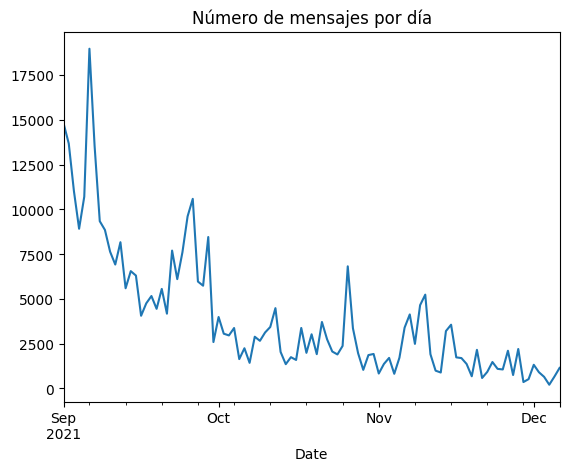

In [36]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.resample('D').size().plot()
plt.title('Número de mensajes por día')
plt.show()

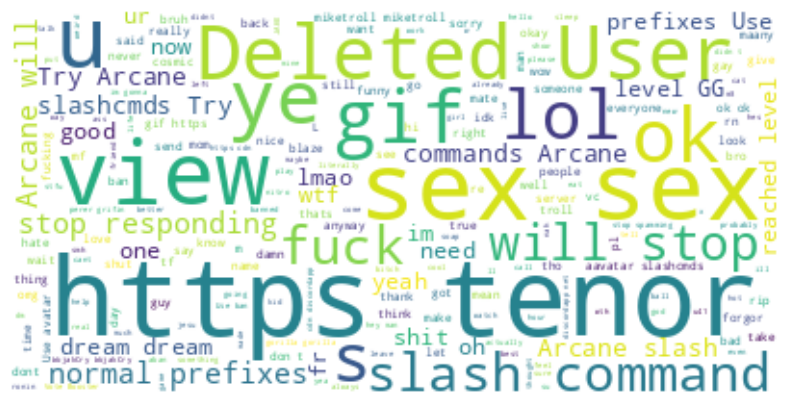

In [37]:
# Generar una nube de palabras con el contenido de los mensajes
text = ' '.join(df['Content'].dropna().tolist())
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
import pandas as pd
import re
from collections import defaultdict

# Inicializa un diccionario para contar las reacciones
reactions_count = defaultdict(int)

# Función para procesar cada fila de la columna Reactions
def process_reactions(row):
    if pd.notnull(row):
        # Encuentra todos los emojis y sus conteos
        reactions = re.findall(r'([^\x00-\x7F]+)\s\((\d+)\)', row)
        for emoji, count in reactions:
            reactions_count[emoji] += int(count)

# Aplica la función a cada fila de la columna 'Reactions'
df['Reactions'].apply(process_reactions)

# Ahora tienes un diccionario con la suma de cada emoji como clave y su conteo total como valor
print(reactions_count)

defaultdict(<class 'int'>, {'🇿': 9, '🇴': 28, '🇸': 26, '🇰': 14, '🇪': 21, '⬅️': 19, '👑': 6, '🥰': 2, '🗿': 140, '💯': 36, '🙄': 1, '💅🏿': 2, '👁️': 8, '👍': 52, '😎': 3, '💝': 1, '😩': 14, '😂': 23, '🤝': 2, '️⃣': 157, '😔': 17, '🖕': 7, '😍': 14, '🙏': 14, '🤍': 6, '👀': 48, '😁': 4, '🤬': 1, '😛': 2, '🤢': 4, '🧢': 18, '🦾': 4, '🇺': 14, '🇮': 18, '🥖': 1, '⭕': 2, '🇳': 18, '🅰️': 4, '🇷': 16, '🥺': 12, '🙏🏿': 1, '✊🏿': 1, '😐': 25, '😳': 12, '😏': 5, '💀': 40, '🇾': 9, '🔁': 1, '🇧': 3, '🇨': 3, '🇼': 13, '🇭': 11, '🇦': 10, '🇹': 16, '😨': 6, '🇰🇿': 1, '🪅': 4, '🐧': 2, '🗣️': 3, '☝️': 5, '🍉': 4, '🖕🏻': 1, '⚡': 1, '🤡': 4, '😱': 4, '😆': 12, '😞': 1, '🆗': 21, '🍞': 2, '😮': 1, '👎': 13, '😈': 10, '🙋': 1, '😫': 1, '😰': 1, '🧐': 1, '❤️': 13, '🇱': 19, '😭': 10, '⏮️': 12, '➡️': 13, '⏭️': 12, '😡': 3, '😢': 1, '💕': 2, '⏹': 1, '🕺🏼': 2, '🤨': 4, '🥲': 2, '⚱️': 1, '💥': 1, '🏳️\u200d🌈': 2, '📧': 1, '❓': 2, '❔': 2, '🤱🏿': 2, '👩🏿\u200d🍼': 1, '😋': 5, '🇨🇳': 2, '🔥': 8, '👌': 56, '💩': 2, '🪨': 4, '☝🏾': 4, '🎉': 1, '🤣': 4, '◀️': 21, '🏤': 2, '📮': 2, '👹': 10, '💨': 1, '🪤':

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8419 (\N{COMBINING ENCLOSING KEYCAP}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128511 (\N{MOYAI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128076 (\N{OK HAND SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128064 (\N{EYES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151:

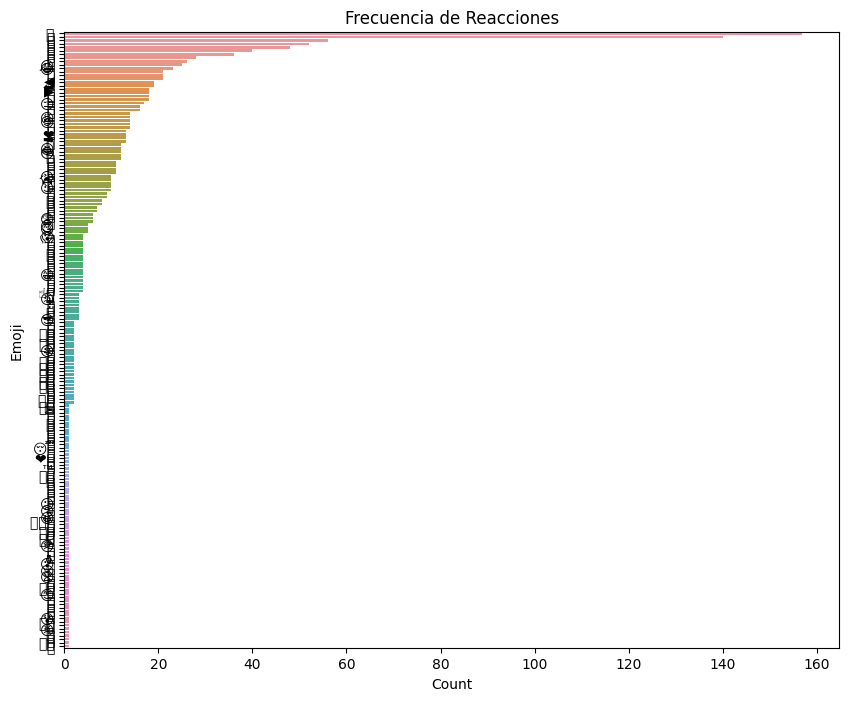

In [41]:
# Convertir el diccionario en un DataFrame para facilitar la visualización
reactions_df = pd.DataFrame(reactions_count.items(), columns=['Emoji', 'Count'])

# Ordenar los datos por conteo y luego graficar
reactions_df = reactions_df.sort_values('Count', ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='Emoji', data=reactions_df)
plt.title('Frecuencia de Reacciones')
plt.show()

In [48]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import string

# Descargar las palabras de parada (stopwords) si aún no lo has hecho
nltk.download('stopwords')
nltk.download('punkt')
negative_words = [
    'bad', 'terrible', 'horrible', 'hate', 'worst', 'sad', 'angry',
    'negative', 'nasty', 'sex', 'awful', 'disgusting', 'displeased',
    'miserable', 'depressed', 'upset', 'disappointing', 'poor', 'harmful',
    'unhappy', 'worthless', 'unpleasant', 'offensive', 'aggressive',
    'hostile', 'jealous', 'nervous', 'scary', 'vicious', 'sinister',
    'evil', 'fear', 'anxious', 'difficult', 'dirty', 'grim', 'cruel',
    'violent', 'scandalous', 'shameful', 'bitter', 'harsh', 'painful',
    'tragic', 'sorrowful', 'toxic', 'dreadful', 'threatening', 'menacing',
    'ominous', 'heavy', 'gloomy', 'melancholy', 'despair', 'rage', 'furious',
    'ruin', 'damaging', 'dangerous', 'defeat', 'fail', 'failure', 'fall',
    'fell', 'drop', 'dropped', 'loss', 'lost', 'missing', 'lack', 'absence',
    'crisis', 'dead', 'death', 'deceit', 'deceive', 'deception', 'deny',
    'denial', 'degrade', 'deplorable', 'depreciate', 'desolate', 'despair',
    'desperate', 'destroy', 'destruction', 'destructive', 'die', 'dismay',
    'disorder', 'disorganized', 'disoriented', 'dispensable', 'dissatisfaction',
    'dissatisfied', 'distress', 'distrust', 'disturbance', 'divisive', 'divorce',
    'dread', 'dreary', 'enrage', 'enraged', 'erode', 'eroding', 'exacerbate',
    'excruciating', 'fail', 'failing', 'flaw', 'flawed', 'flee', 'fled',
    'fright', 'frighten', 'frightful', 'grim', 'guilt', 'guilty', 'harm',
    'harsh', 'harshly', 'hazard', 'hazardous', 'hopeless', 'horrendous',
    'hostility', 'humiliate', 'humiliating', 'hurt', 'hurtful', 'incapable',
    'inclement', 'incompatible', 'inconceivable', 'inconsistency', 'inconsistent',
    'incurable', 'indecent', 'indict', 'ineffective', 'ineffectively', 'inflict',
    'infringe', 'infuriate', 'infuriating', 'injure', 'injurious', 'insanity',
    'insidious', 'insipid', 'insult', 'insulting', 'intense', 'interfere',
    'intimidate', 'intimidating', 'irrational', 'irritate', 'irritating',
    'isolate', 'isolated', 'jeopardy', 'lament', 'languish', 'lapse', 'lethal',
    'lonely', 'lurid', 'mad', 'malicious', 'malign', 'malignant', 'mangle',
    'manipulate', 'manipulative', 'martyrdom', 'miserable', 'misery', 'mislead',
    'misleading', 'mistake', 'mistrust', 'mourn', 'mourning', 'murder', 'nasty',
    'nefarious', 'neglect', 'neglected', 'negligence', 'neurotic', 'nightmare',
    'obnoxious', 'obscene', 'oppress', 'oppression', 'outrage', 'outrageous',
    'overwhelm', 'overwhelming', 'pain', 'painful', 'pandemonium']
# Filtrar los comentarios que tienen un sentimiento negativo
negative_comments = df[df['Sentiment'] < -0.5]['Content'].dropna()

# Tokenizar los comentarios y convertirlos en una lista de palabras
# Eliminar las palabras de parada y la puntuación
stop_words = set(stopwords.words('english'))
words = []
for comment in negative_comments:
    # Tokeniza y convierte a minúsculas
    tokens = word_tokenize(comment.lower())
    # Eliminar palabras de parada y puntuación
    words.extend([word for word in tokens if word not in stop_words and word not in string.punctuation])

# Contar la frecuencia de cada palabra
word_counts = Counter(words)

# Identificar las palabras negativas más comunes
# Para esto, necesitarías una lista de palabras negativas predefinida o utilizar alguna heurística
negative_word_counts = {word: count for word, count in word_counts.items() if word in negative_words}

# Imprimir las palabras negativas más comunes
print(Counter(negative_word_counts).most_common())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[('hate', 1000), ('bad', 902), ('die', 553), ('dead', 453), ('pain', 280), ('sad', 161), ('disgusting', 158), ('death', 125), ('hurt', 120), ('fail', 118), ('worst', 117), ('mad', 91), ('vicious', 65), ('horrible', 63), ('depressed', 56), ('sex', 55), ('nasty', 47), ('poor', 36), ('angry', 35), ('murder', 35), ('scary', 34), ('rage', 34), ('ruin', 30), ('dirty', 27), ('lost', 22), ('evil', 19), ('insult', 17), ('drop', 14), ('destroy', 13), ('negative', 13), ('missing', 11), ('jealous', 11), ('fell', 11), ('awful', 11), ('difficult', 11), ('threatening', 10), ('violent', 10), ('upset', 9), ('failure', 9), ('toxic', 8), ('fall', 8), ('nervous', 7), ('miserable', 7), ('mistake', 6), ('dropped', 6), ('heavy', 6), ('painful', 6), ('cruel', 6), ('fear', 5), ('harm', 5), ('guilty', 5), ('terrible', 5), ('crisis', 4), ('neglected', 4), ('hostility', 4), ('hostile', 4), ('furious', 4), ('horrendous', 4), ('worthless', 3), ('failing', 3), ('divorce', 3), ('anxious', 3), ('defeat', 3), ('insanit

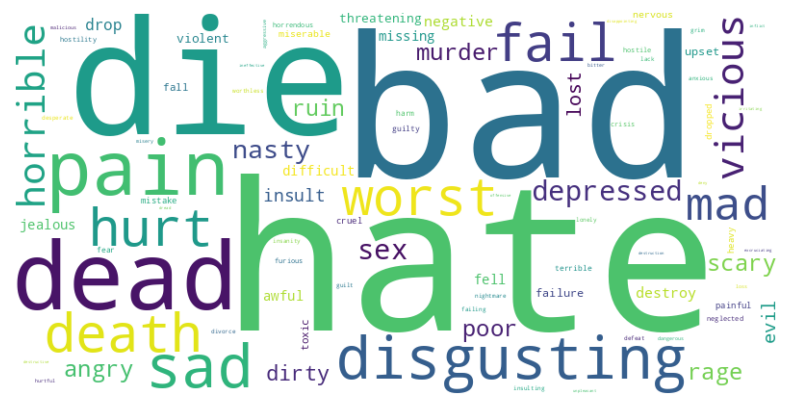

In [49]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Usar el diccionario 'negative_word_counts' que creaste anteriormente para generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(negative_word_counts)

# Visualizar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar los ejes
plt.show()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 92432 (\N{BAMUM LETTER PHASE-D NGKEURI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9956 (\N{PENTAGRAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120444 (\N{MATHEMATICAL MONOSPACE CAPITAL M}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 120458 (\N{MATHEMATICAL MONOSPACE SMALL A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarni

ValueError: ignored

<Figure size 1500x500 with 1 Axes>

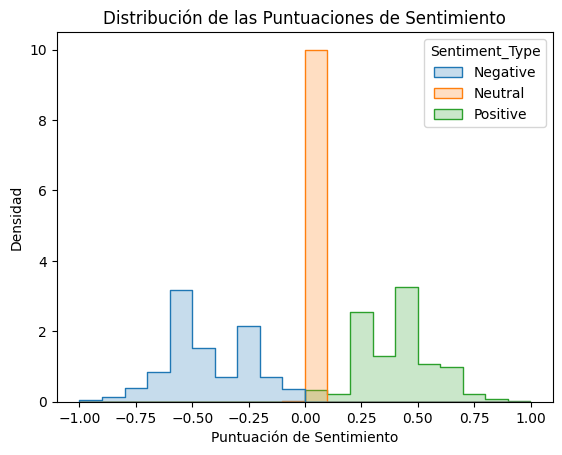

In [50]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que VADER esté listo para usarse
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimientos VADER
sid = SentimentIntensityAnalyzer()

# Función para obtener la puntuación de sentimiento de un comentario
def detect_sentiment(text):
    if pd.notna(text):
        return sid.polarity_scores(text)['compound']
    else:
        return 0  # Asumir neutralidad para comentarios vacíos

# Aplicar la función a todos los comentarios
df['Sentiment_Score'] = df['Content'].apply(detect_sentiment)

# Agregar una columna para categorizar los comentarios
df['Sentiment_Type'] = pd.cut(df['Sentiment_Score'],
                               bins=[-1, -0.05, 0.05, 1],
                               labels=['Negative', 'Neutral', 'Positive'],
                               include_lowest=True)

# Visualizar la distribución de los sentimientos para cada autor
plt.figure(figsize=(15, 5))
sns.countplot(x='Author', hue='Sentiment_Type', data=df)
plt.title('Distribución de los Sentimientos por Autor')
plt.xticks(rotation=90)
plt.show()

# Otra opción es visualizar la distribución de las puntuaciones de sentimiento
sns.histplot(data=df, x='Sentiment_Score', hue='Sentiment_Type', element='step', stat='density', common_norm=False)
plt.title('Distribución de las Puntuaciones de Sentimiento')
plt.xlabel('Puntuación de Sentimiento')
plt.ylabel('Densidad')
plt.show()

In [44]:
# Asegúrate de importar las librerías necesarias
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Descarga los datos de VADER si aún no lo has hecho
nltk.download('vader_lexicon')

# Inicializa el analizador de sentimientos de VADER
sid = SentimentIntensityAnalyzer()

# Función para calcular el sentimiento de un comentario
def get_sentiment(text):
    if pd.notna(text):
        return sid.polarity_scores(text)['compound']
    else:
        return None  # Retorna None si el texto es NaN

# Aplica la función a la columna 'Content' sin eliminar los NaN para mantener el mismo índice
df['Sentiment'] = df['Content'].apply(get_sentiment)

# Filtra los comentarios con un sentimiento negativo
df['Negative'] = df['Sentiment'] < -0.5

# Agrupa por 'Author' y cuenta los valores negativos
negative_comments_by_author = df.groupby('Author')['Negative'].sum()

print(negative_comments_by_author)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Author
$)3!#1435                             0
+<#9693                               1
,llvsyn#8006                          0
...youtc#6959                         0
._bummy                               0
                                     ..
🍄Alice🍄#4119                          0
🎃  MaTuZ  🎃#5633                      0
💙-_-🤍_-𝐘𝐨𝐮𝐫𝐃𝐮𝐝𝐞𝐂𝐲𝐫𝐮𝐥𝐞-_-🤍-_-💙#1350    0
💞💞#6072                               0
😩😈#7308                               0
Name: Negative, Length: 1512, dtype: int64
